In [43]:
import matplotlib.pyplot as plt
import json

In [44]:
def load_and_get_spearman(path):
    json_ = json.loads(open(path).read())
    return [i["eval_spearman"] for i in json_["log_history"]]

bertic_mse = load_and_get_spearman("./states/ce_states/obican_mse.json")
bertic_ce = load_and_get_spearman("./states/ce_states/obican_bce.json")
bertic_ner_mse = load_and_get_spearman("./states/ce_states/ner_mse.json")
bertic_ner_ce = load_and_get_spearman("./states/ce_states/ner_bce.json")

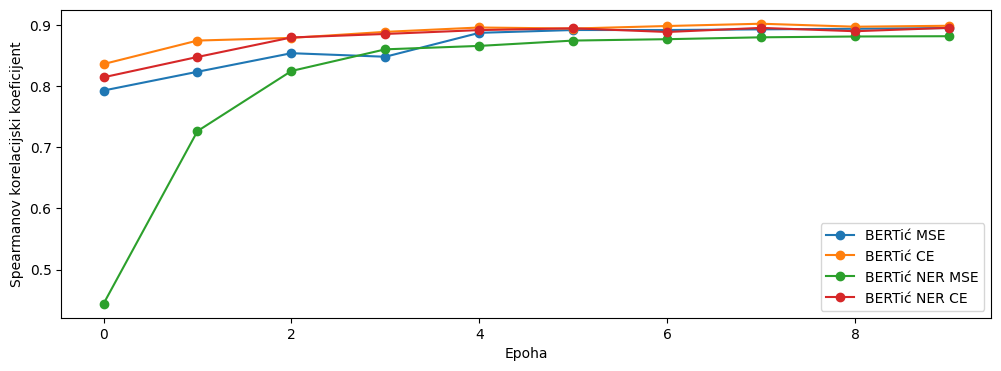

In [45]:
def plot_spearman_coefficient(models, labels, path):
    plt.figure(figsize=(12, 4))
    for m, l in zip(models, labels):
        plt.plot(range(len(m)), m, "-o", label=l)
    plt.xlabel("Epoha")
    plt.ylabel("Spearmanov korelacijski koeficijent")
    plt.legend()
    plt.savefig(path)
    plt.show()
    
plot_spearman_coefficient(
    [bertic_mse, bertic_ce, bertic_ner_mse, bertic_ner_ce],
    ["BERTić MSE", "BERTić CE", "BERTić NER MSE", "BERTić NER CE"],
    "../figures/cross_encoders.png"
)

In [46]:
def load_and_get_spearman_bi_encoder(path):
    json_ = json.loads(open(path).read())
    return json_["validation_spearman"]

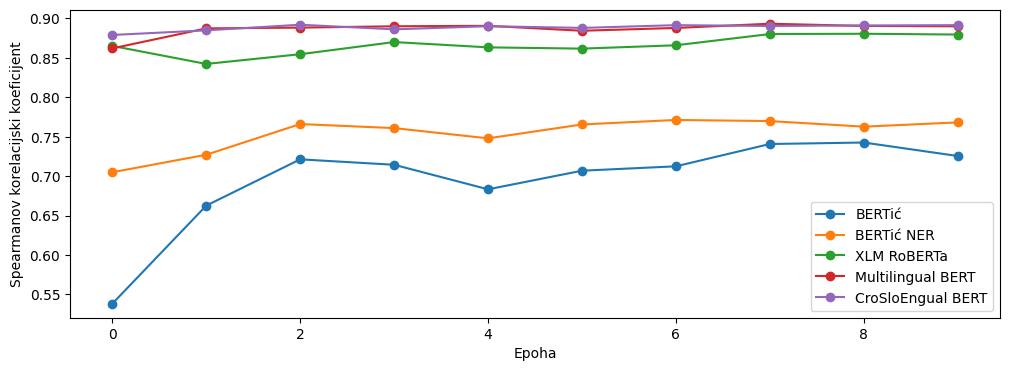

In [47]:
bertic = load_and_get_spearman_bi_encoder("./states/article_bertic_states/bertic.json")
bertic_ner = load_and_get_spearman_bi_encoder("./states/article_bertic_states/bertic_ner.json")
xlm_roberta = load_and_get_spearman_bi_encoder("./states/article_bertic_states/xlm_roberta.json")
multilingual_bert = load_and_get_spearman_bi_encoder("./states/article_bertic_states/mbert.json")
crosloengual_bert = load_and_get_spearman_bi_encoder("./states/article_bertic_states/crosloengual_bert.json")
    
plot_spearman_coefficient(
    [bertic, bertic_ner, xlm_roberta, multilingual_bert, crosloengual_bert],
    ["BERTić", "BERTić NER", "XLM RoBERTa", "Multilingual BERT", "CroSloEngual BERT"],
    "../figures/bi_encoders.png"
)